In [6]:
%pip install pandas_datareader
%pip install --upgrade pandas
%pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2022, 8, 1)

# df = web.DataReader('TSLA', 'yahoo', start, end)
# df.to_csv("tsla.csv")
df = pd.read_csv("tsla.csv", parse_dates=True, index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


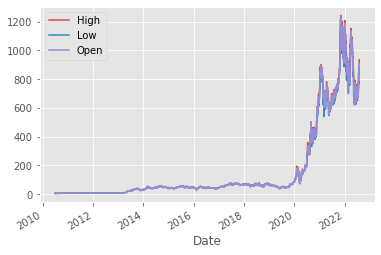

In [3]:
df[['High','Low','Open']].plot()
plt.show()

In [4]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean() # moving average
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3044 entries, 2010-06-29 to 2022-08-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3044 non-null   float64
 1   Low        3044 non-null   float64
 2   Open       3044 non-null   float64
 3   Close      3044 non-null   float64
 4   Volume     3044 non-null   float64
 5   Adj Close  3044 non-null   float64
 6   100ma      3044 non-null   float64
dtypes: float64(7)
memory usage: 190.2 KB


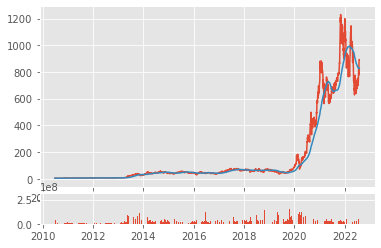

In [5]:
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [6]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())
print(df_volume.head())

             open   high    low  close
Date                                  
2010-06-29  4.778  4.778  3.160  3.492
2010-07-09  3.480  4.128  3.410  4.128
2010-07-19  4.382  4.382  4.044  4.144
2010-07-29  4.070  4.390  3.918  3.918
2010-08-08  3.920  3.920  3.520  3.830
Date
2010-06-29    354060000.0
2010-07-09     97447500.0
2010-07-19     45924000.0
2010-07-29     27213000.0
2010-08-08     25751500.0
Freq: 10D, Name: Volume, dtype: float64


In [7]:
df_ohlc.reset_index(inplace=True)
df_ohlc.head()

,Date,open,high,low,close
0,2010-06-29,4.778,4.778,3.160,3.492
1,2010-07-09,3.480,4.128,3.410,4.128
2,2010-07-19,4.382,4.382,4.044,4.144
3,2010-07-29,4.070,4.390,3.918,3.918
4,2010-08-08,3.920,3.920,3.520,3.830


In [8]:
import matplotlib.dates as mdates
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

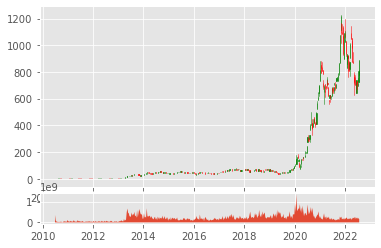

In [9]:
from mplfinance.original_flavor import candlestick_ohlc
ax1 = plt.subplot2grid((6,1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [2]:
import bs4 as bs
import pickle
import requests
import os

In [11]:
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]: # tr:table row; [0]:table header
        ticker = row.findAll('td')[0].text # soup to text
        ticker = ticker[:-1].replace(".", "-")
        tickers.append(ticker)
    with open("sp500tickers.pickle", 'wb') as f:
        pickle.dump(tickers, f)
    return tickers

save_sp500_tickers()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

In [3]:
from numpy import NaN
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", 'rb') as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2021, 12, 31)


    for ticker in tickers:
        try:
            if not os.path.exists(f"stock_dfs/{ticker}.csv"):
                print(ticker)
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv(f"stock_dfs/{ticker}.csv")
            else:
                print(f"Already exists {ticker}")
        except:
            df = pd.DataFrame({"Date":NaN, "High":NaN, "Low":NaN, "Open":NaN, "Close Volume":NaN, "Adj Close":NaN}, index=[0])
            df.to_csv(f"stock_dfs/{ticker}.csv")

get_data_from_yahoo()    

Already exists MMM
Already exists AOS
Already exists ABT
Already exists ABBV
Already exists ABMD
Already exists ACN
Already exists ATVI
Already exists ADM
Already exists ADBE
Already exists ADP
Already exists AAP
Already exists AES
Already exists AFL
Already exists A
Already exists APD
Already exists AKAM
Already exists ALK
Already exists ALB
Already exists ARE
Already exists ALGN
Already exists ALLE
Already exists LNT
Already exists ALL
Already exists GOOGL
Already exists GOOG
Already exists MO
Already exists AMZN
Already exists AMCR
Already exists AMD
Already exists AEE
Already exists AAL
Already exists AEP
Already exists AXP
Already exists AIG
Already exists AMT
Already exists AWK
Already exists AMP
Already exists ABC
Already exists AME
Already exists AMGN
Already exists APH
Already exists ADI
Already exists ANSS
Already exists AON
Already exists APA
Already exists AAPL
Already exists AMAT
Already exists APTV
Already exists ANET
Already exists AJG
Already exists AIZ
Already exists T

In [14]:
def comile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    main_df = pd.DataFrame()
    for count, ticker in enumerate(tickers):
        df = pd.read_csv(f"stock_dfs/{ticker}.csv")
        if df['Date'].isnull().all():
            continue
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close':ticker}, inplace = True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
    
        if count % 10 == 0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv("sp500_joined_closes.csv")

comile_data() 

C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

0


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

10


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

20


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

30


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

40


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

50


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

60


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

70


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

80


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

90


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

100


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

110


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

120


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

130


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

140


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

150


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

160


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

170


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

180


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

190


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

200


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

210


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

220


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

230


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

240


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

250


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

260


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

270


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

280


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

290


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

300


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

310


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

320


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

330


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

340


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

350


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

360


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

370


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

380


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

390


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

400


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

410


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

420


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

430


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

440


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

450


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

460


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

470


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

480


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

490


C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
C:\Users\89238\AppData\Local\Temp/ipykernel_18652/3368252164.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be k

500
                  MMM       AOS       ABT  ABBV      ABMD  ACN      ATVI  \
Date                                                                       
2000-01-03  26.434860  2.406341  9.306481   NaN  18.25000  NaN  1.214421   
2000-01-04  25.384468  2.371668  9.040581   NaN  17.81250  NaN  1.177480   
2000-01-05  26.119740  2.364733  9.023960   NaN  18.00000  NaN  1.182097   
2000-01-06  28.220526  2.330060  9.339720   NaN  18.03125  NaN  1.159010   
2000-01-07  28.780739  2.427145  9.439428   NaN  17.93750  NaN  1.191333   

                 ADM       ADBE        ADP  ...  WTW        GWW  WYNN  \
Date                                        ...                         
2000-01-03  6.683012  16.274668  25.725367  ...  NaN  30.886005   NaN   
2000-01-04  6.613398  14.909398  25.725367  ...  NaN  30.003555   NaN   
2000-01-05  6.508976  15.204175  25.478001  ...  NaN  30.423775   NaN   
2000-01-06  6.543787  15.328289  25.818129  ...  NaN  30.297716   NaN   
2000-01-07  6.648204  16.

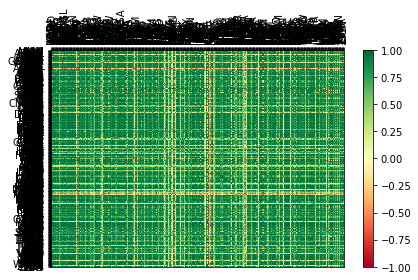

In [4]:
import numpy as np
def visualize_data():
    df = pd.read_csv("sp500_joined_closes.csv")
    df_corr = df.corr()
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(111)

    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()

visualize_data()

In [5]:
def process_data_for_labels(ticker, hm_days):
    df = pd.read_csv("sp500_joined_closes.csv", index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df[f"{ticker}_{i}d"] = (df[ticker].shift(-i) - df[ticker])/df[ticker]
        df.fillna(0, inplace=True)
    return tickers, df

tickers, df = process_data_for_labels('XOM',7)
df.tail()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,ZBH,ZION,ZTS,XOM_1d,XOM_2d,XOM_3d,XOM_4d,XOM_5d,XOM_6d,XOM_7d
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-27,173.257355,83.623062,139.781876,130.686050,357.829987,411.562225,65.063255,65.419395,577.679993,243.909973,...,123.570305,62.253880,245.234528,-0.003232,-0.011957,-0.017773,-0.01131,0.0,0.0,0.0
2021-12-28,174.179047,84.452385,138.803635,130.666611,357.440002,411.502747,66.276047,66.270920,569.359985,243.692108,...,123.957039,62.352684,242.986221,-0.008753,-0.014589,-0.008105,0.00000,0.0,0.0,0.0
2021-12-29,174.934052,84.718948,139.515076,131.609741,361.839996,411.651459,66.763161,66.350136,569.289978,245.613358,...,123.976379,62.688602,245.751831,-0.005887,0.000654,0.000000,0.00000,0.0,0.0,0.0
2021-12-30,174.179047,84.205559,139.327332,132.163940,362.059998,410.075806,67.091202,66.201614,570.530029,243.187027,...,124.015045,62.372444,243.891510,0.006580,0.000000,0.000000,0.00000,0.0,0.0,0.0
2021-12-31,174.169266,84.758446,139.070419,131.648621,359.170013,410.789276,66.136879,66.924416,567.059998,244.197174,...,122.825851,62.402081,242.767349,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0


In [14]:
def buy_sell_hold(*args):
    requirement = 0.025
    cols = [c for c in args]
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [15]:
from collections import Counter
def extract_features(ticker, hm_days):
    tickers, df = process_data_for_labels(ticker, hm_days)
    df[f"{ticker}_target"] = list(map(buy_sell_hold, df[f"{ticker}_1d"], df[f"{ticker}_2d"], df[f"{ticker}_3d"], df[f"{ticker}_4d"], df[f"{ticker}_5d"], df[f"{ticker}_6d"],df[f"{ticker}_7d"]))
    
    vals = df[f"{ticker}_target"].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    df.fillna(0, inplace = True)
    
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change() # normalize
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace = True)
    
    x = df_vals.values 
    y = df[f"{ticker}_target"].values
    
    return x, y, df

extract_features('XOM', 7)

Data spread: Counter({'0': 2110, '1': 1802, '-1': 1624})


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-3.97351127e-02, -1.44089038e-02, -2.85715515e-02, ...,
          0.00000000e+00, -4.84233717e-02,  0.00000000e+00],
        [ 2.89654072e-02, -2.92415238e-03, -1.83844782e-03, ...,
          0.00000000e+00, -1.18351530e-03,  0.00000000e+00],
        ...,
        [ 4.33464815e-03,  3.15637522e-03,  5.12552169e-03, ...,
          1.56025953e-04,  5.38739321e-03,  1.13817554e-02],
        [-4.31594007e-03, -6.05991454e-03, -1.34569071e-03, ...,
          3.11880147e-04, -5.04331381e-03, -7.56991733e-03],
        [-5.61541929e-05,  6.56592000e-03, -1.84394712e-03, ...,
         -9.58910851e-03,  4.75151863e-04, -4.60926568e-03]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
                    MMM        AOS         ABT        ABBV        ABMD  \
 Date                                                                    
 2000-01-03   26.434860   2.406341 

In [18]:
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

def do_ml1(ticker):
    X, y, df = extract_features(ticker, 7)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy:',confidence)
    predictions = clf.predict(X_test)
    print("Predicted spread:", Counter(predictions))
    return confidence

do_ml1('TSLA')

Data spread: Counter({'0': 2794, '1': 1542, '-1': 1200})
Accuracy: 0.47143890093998553
Predicted spread: Counter({-1: 511, 0: 482, 1: 390})


0.47143890093998553

In [19]:
def do_ml2(ticker):
    X, y, df = extract_features(ticker, 7)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy:',confidence)
    predictions = clf.predict(X_test)
    print("Predicted spread:", Counter(predictions))
    return confidence

do_ml2('TSLA')

Data spread: Counter({'0': 2794, '1': 1542, '-1': 1200})
Accuracy: 0.6673897324656544
Predicted spread: Counter({0: 756, -1: 356, 1: 271})


0.6673897324656544